In [3]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
df=pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


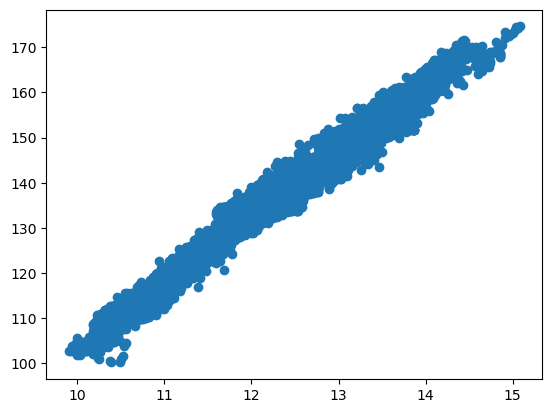

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x="CDP",y="TEY",data=df)

<AxesSubplot:>

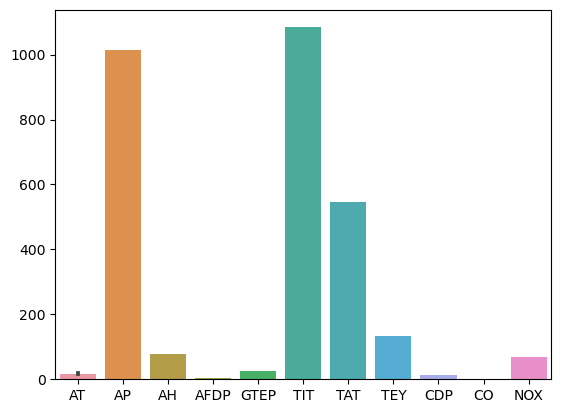

In [10]:
sns.barplot(data=df)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

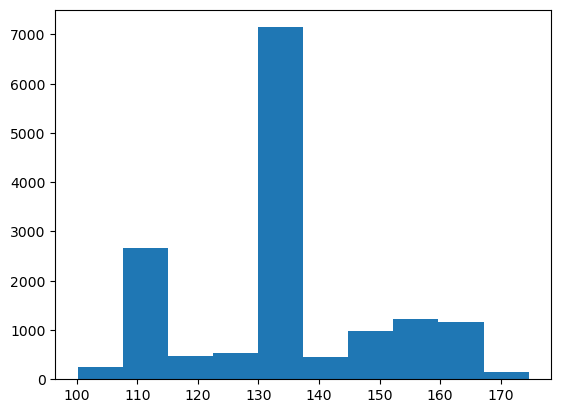

In [11]:
plt.hist(df['TEY'])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_df=scaler.fit_transform(df)
df1=pd.DataFrame(standardized_df, columns=df.columns)
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [16]:
X=df.drop(["TEY"],axis=1)
y=df["TEY"]
X


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [17]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [18]:
n_features =X.shape[1]
n_features

10

In [19]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=n_features, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    optmizer =RMSprop(0.03)
    model.compile(loss='mean_squared_error', optimizer=optmizer, metrics=['accuracy'])
    return model

In [20]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)


C:\Users\prabi\AppData\Local\Temp\ipykernel_13392\2086506507.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  20.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  21.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  20.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  19.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  20.1s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [21]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 50}
0.0,0.0 with: {'batch_size': 10, 'epochs': 100}
0.0,0.0 with: {'batch_size': 20, 'epochs': 10}
0.0,0.0 with: {'batch_size': 20, 'epochs': 50}
0.0,0.0 with: {'batch_size': 20, 'epochs': 100}
0.0,0.0 with: {'batch_size': 40, 'epochs': 10}
0.0,0.0 with: {'batch_size': 40, 'epochs': 50}
0.0,0.0 with: {'batch_size': 40, 'epochs': 100}


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [24]:
optmizer =RMSprop(0.001)
model_new=keras.Sequential([
    keras.layers.Dense(4,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(2,activation ='relu')
])
model_new.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [25]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model_new.fit(X_train, y_train, epochs=10, batch_size=10, verbose = 1)

Epoch 1/10
1053/1053 [==============================] - 2s 2ms/step - loss: 1067.5519 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 2s 2ms/step - loss: 163.8939 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 2s 2ms/step - loss: 103.2766 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 2s 2ms/step - loss: 51.5741 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 2s 2ms/step - loss: 24.7231 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 2s 2ms/step - loss: 18.0378 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 2s 2ms/step - loss: 15.3843 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 2s 2ms/step - loss: 13.6490 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 2s 2ms/step - loss: 11.9111 - accuracy: 0.0000e+00
Epoch 10/10
1053/1053 [==========

In [26]:
model_new.evaluate(X_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 9.4022 - accuracy: 0.0000e+00


[9.402240753173828, 0.0]